<a href="https://colab.research.google.com/github/ArunVignesh75/ArunVignesh75/blob/main/Boston_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing price using XGBOOST
Predicting Median value of owner-occupied homes
The aim of this assignment is to learn the application of machine learning algorithms to data sets. This involves learning what data means, how to handle data, training, cross validation, prediction, testing your model, etc.
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms. The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
The dataset is small in size with only 506 cases. It can be used to predict the median value of a home, which is done here. There are 14 attributes in each case of the dataset

#Importing Packages

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

#Loading the Dataset

In [10]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [11]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


#EDA

In [13]:
boston.shape

(506, 13)

In [14]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [15]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd69dfd9a30>,
      dtype=object)

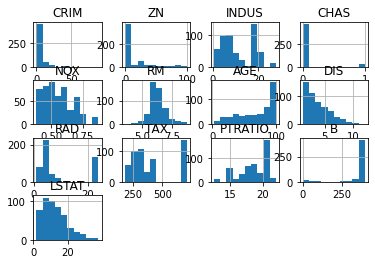

In [16]:
boston.hist()

In [50]:
boston['PRICE'] = boston_dataset.target

In [74]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

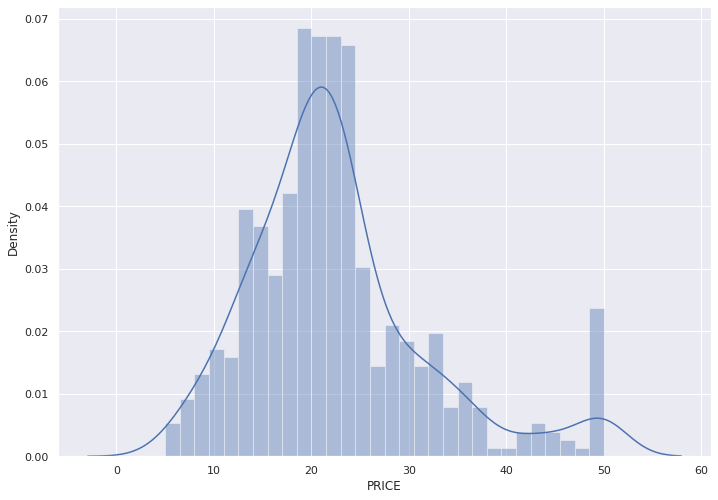

In [54]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['PRICE'], bins=30)
plt.show()

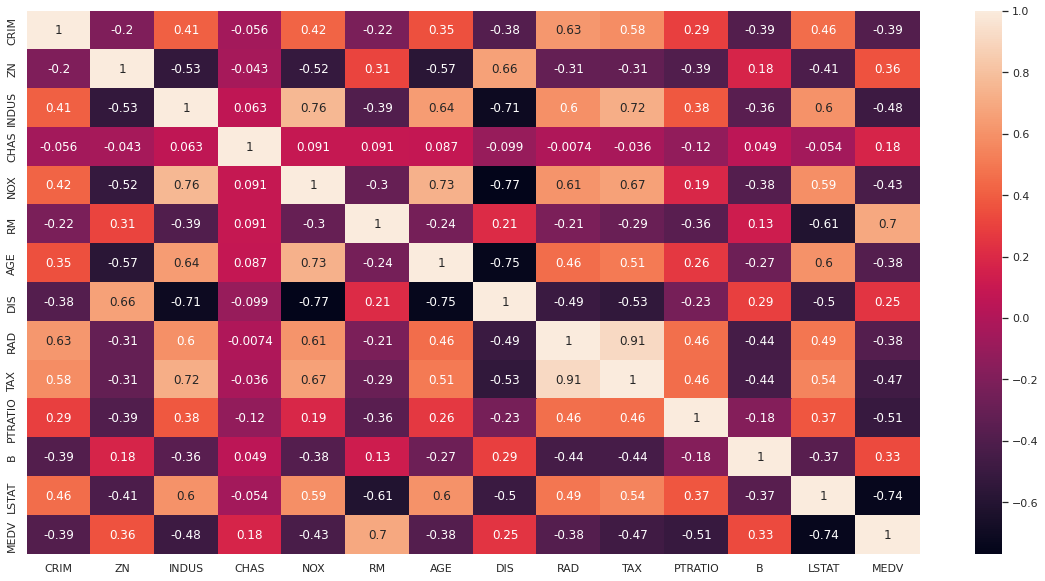

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(boston.corr(),annot=True)
plt.ioff()

In [55]:
boston.corr()['PRICE']

CRIM      -0.388305
ZN         0.374691
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.253175
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

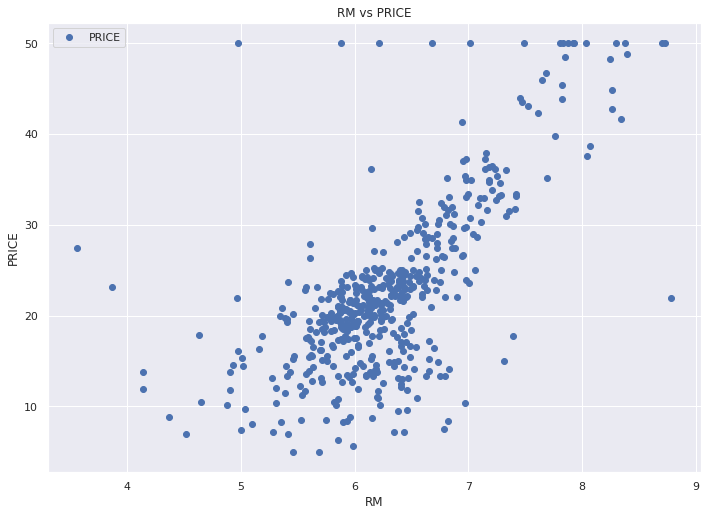

In [56]:
boston.plot(x='RM', y='PRICE', style='o')
plt.title('RM vs PRICE')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

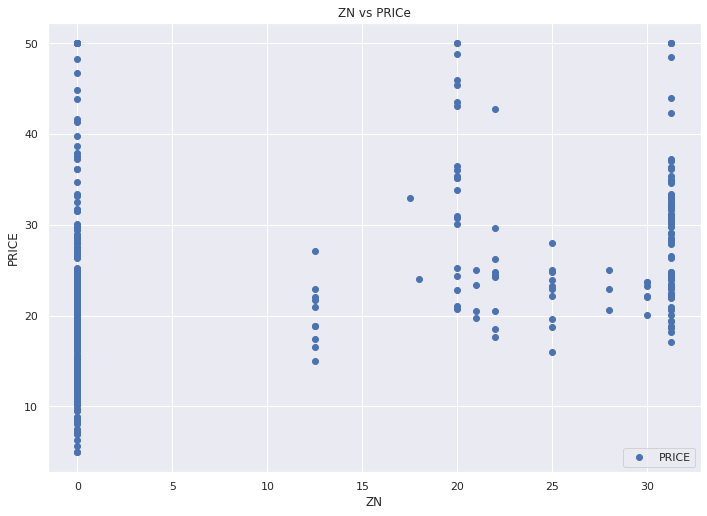

In [57]:
boston.plot(x='ZN', y='PRICE', style='o')
plt.title('ZN vs PRICe')
plt.xlabel('ZN')
plt.ylabel('PRICE')
plt.show()

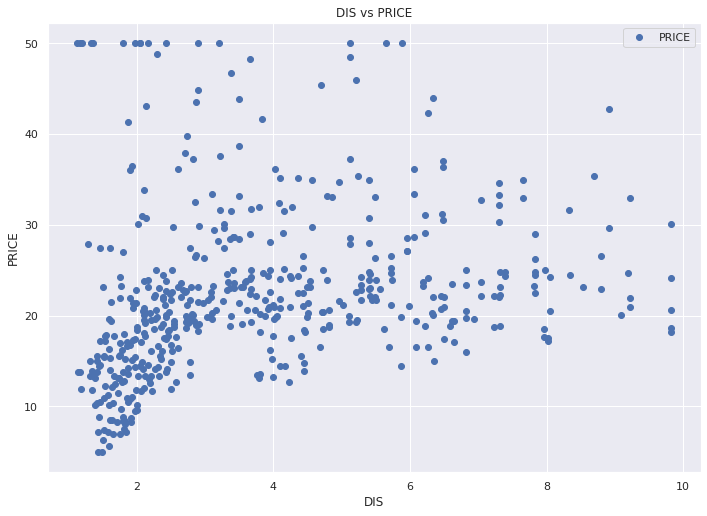

In [58]:

boston.plot(x='DIS', y='PRICE', style='o')
plt.title('DIS vs PRICE')
plt.xlabel('DIS')
plt.ylabel('PRICE')
plt.show()

#Checking for Outliers 

In [59]:
iqr = boston.ZN.quantile(0.75) - boston.ZN.quantile(0.25)
upper_threshold = boston.ZN.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = boston.ZN.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
lower_threshold

-18.75

In [60]:
iqr = boston.DIS.quantile(0.75) - boston.DIS.quantile(0.25)
upper_threshold = boston.DIS.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = boston.DIS.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
lower_threshold, upper_threshold

(-2.5322000000000005, 9.820800000000002)

In [61]:
upper_threshold

9.820800000000002

In [28]:
boston.ZN = boston.ZN.clip(-18.75, 31.25)

In [29]:
boston.DIS = boston.DIS.clip(-2.53, 9.82)

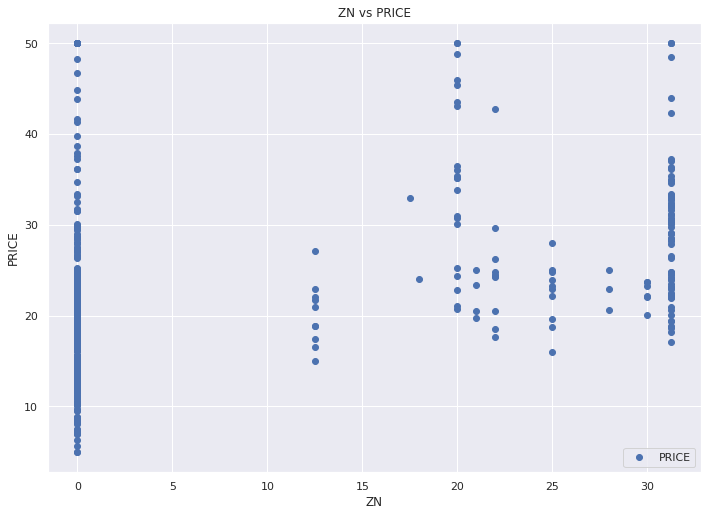

In [62]:
boston.plot(x='ZN', y='PRICE', style='o')
plt.title('ZN vs PRICE')
plt.xlabel('ZN')
plt.ylabel('PRICE')
plt.show()

In [64]:
df = boston['PRICE'] 

#Spliting the Dataset

In [66]:
X = boston.drop(['PRICE'], axis = 1) #array of features
y = df.values #array of targets

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scaling the Data

In [68]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test = scaler.transform(X_test) # transform the test data 

#Initializing the Model

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.05983929327745807  Cross-Val score :  -0.18341338773532093
Learning rate :  0.02  Train score :  0.7836878643185179  Cross-Val score :  0.7054102015784014
Learning rate :  0.03  Train score :  0.9212807271561865  Cross-Val score :  0.84425525964032
Learning rate :  0.04  Train score :  0.9510919719145299  Cross-Val score :  0.8714381423183397
Learning rate :  0.05  Train score :  0.9613743388049333  Cross-Val score :  0.8719850624728742
Learning rate :  0.06  Train score :  0.9661749993019575  Cross-Val score :  0.8829398629500392
Learning rate :  0.07  Train score :  0.9704532198904859  Cross-Val score :  0.8823846191156124
Learning rate :  0.08  Train score :  0.9740728338475562  Cross-Val score :  0.8858928581459484
Learning rate :  0.09  Train score :  0.9764267199722229  Cross-Val score :  0.8885826429773562
Learning rate :  0.1  Train score :  0.9793647363816111  Cross-Val score :  0.8853515751519664
Learning rate :  0.11  Train score :  0

In [71]:
model = xgb.XGBRegressor(learning_rate = 0.2, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test) # scoring the model - r2 squared

[06:51:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7623361500815062

In [72]:
y_pred = model.predict(X_test)
y_pred


array([26.050072 , 26.979721 , 23.874746 , 10.586288 , 22.056107 ,
       20.51561  , 21.840181 , 20.359224 , 24.413475 , 17.532673 ,
        6.8974447, 15.312273 , 15.75199  ,  9.884268 , 49.329807 ,
       34.1569   , 20.825533 , 35.72184  , 28.047607 , 22.47239  ,
       23.451725 , 22.784325 , 19.888195 , 25.402681 , 20.50145  ,
       22.02102  , 17.767464 , 15.853863 , 38.25203  , 19.040098 ,
       16.236156 , 18.417128 , 19.565016 , 20.591906 , 24.948656 ,
       17.83604  ,  8.145323 , 26.671183 , 14.300725 , 15.987125 ,
       24.591177 , 20.995043 , 23.115269 , 16.896727 , 22.764265 ,
       20.82854  , 20.447277 , 17.757305 , 15.232406 , 23.141855 ,
       17.717377 , 21.06206  , 20.403728 , 38.53956  , 14.649954 ,
       21.306929 , 18.913197 , 18.071344 , 16.12738  , 19.92134  ,
       22.61913  , 21.44157  , 35.68272  , 32.734818 , 19.756872 ,
       28.668348 , 16.918406 , 21.17203  , 17.749998 , 24.341003 ,
       20.83815  , 23.528116 , 24.476456 , 30.219849 , 23.9372

In [75]:
from sklearn import metrics
print('The XGBoost model having R2- SCORE:', metrics.r2_score(y_test,y_pred))

The XGBoost model having R2- SCORE: 0.7623361500815062
